# MSiA 423 - Cloud Engineering for Data Science - Final Project
## Group 7: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# General EDA

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import zipfile
import time

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
## Reading the csv file directly from the zip file without extracting it
archive = zipfile.ZipFile('../02_Data/archive.zip', 'r')
files = archive.namelist()
with archive.open(files[0]) as csvfile:   
    df = pd.read_csv(csvfile)

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Remove unnamed column 
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
# Number of observations & features 
df.shape

(300153, 11)

In [5]:
# Data types 
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [6]:
# Check missing values 
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
# Summary statistics for numerical variables 
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## PRICE

[Text(0.5, 1.0, 'Ticket Price Distribution'), Text(0.5, 0, 'Price')]

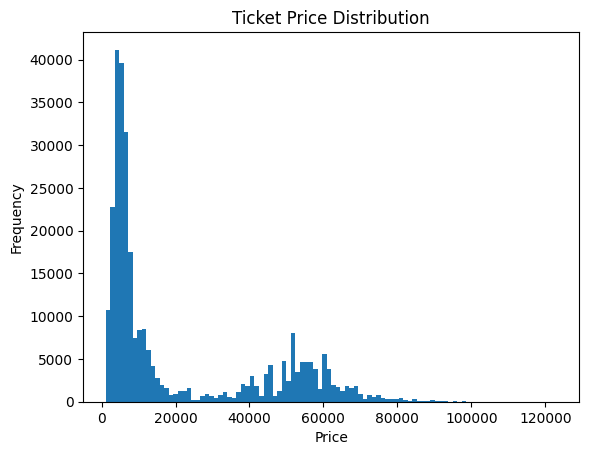

In [8]:
df.price.plot(kind = 'hist', bins = 100).set(title = 'Ticket Price Distribution', xlabel = 'Price')

[Text(0.5, 1.0, 'Log-Price Ticket Distribution'), Text(0.5, 0, 'Log-Price')]

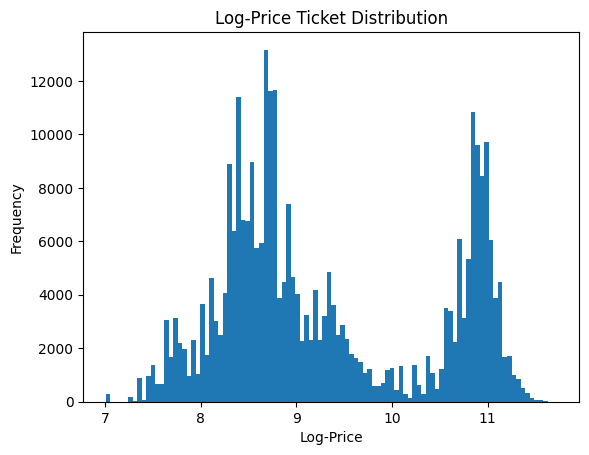

In [9]:
np.log(df.price).plot(kind = 'hist', bins = 100).set(title = 'Log-Price Ticket Distribution', xlabel = 'Log-Price')

Price is skewed and has many outliers in the original distribution (for more than 80K). Applying logarithm helps to center the data and remove some outliers.  

In [10]:
df['log_price'] = np.log(df.price)

## AIRLINE

In [11]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

<Axes: title={'center': 'Airlines'}, xlabel='airline'>

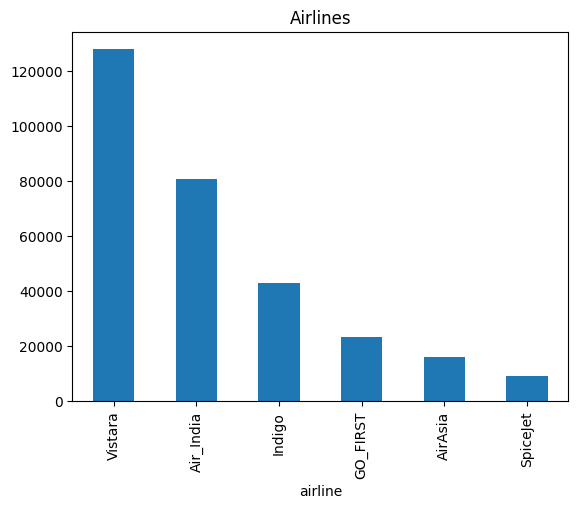

In [12]:
df.airline.value_counts().plot(kind = 'bar', title = 'Airlines')

[Text(0.5, 1.0, 'log-price distribution per airline')]

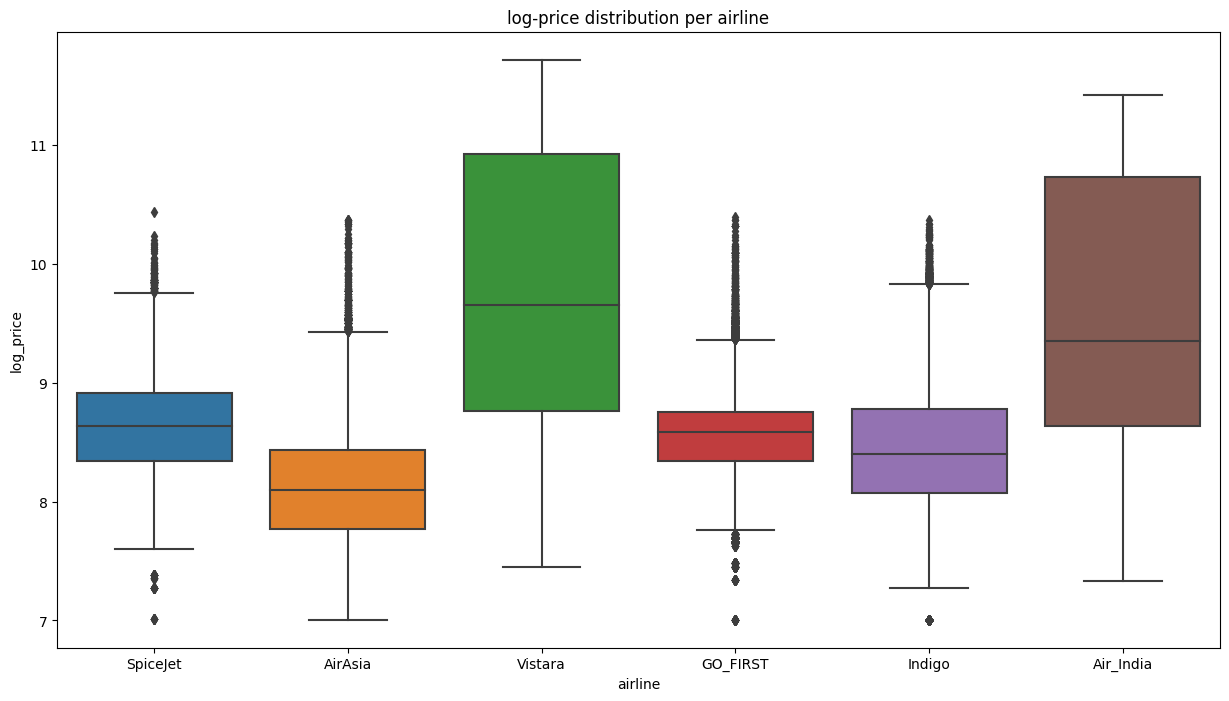

In [13]:
# Group data by airline and get boxplot for price
#df.groupby("airline").boxplot(column="price", figsize=(15,15)) 
plt.figure(figsize=(15,8))
sns.boxplot(x="airline", y="log_price", data=df).set(title='log-price distribution per airline')

Log(price) distribution varies accross airlines. Vistara & Air India are the more expensive ones. Could consider SpiceJet, AirAsia, GO_FIRST and Indigo as low-cost airlines. Could be a variable suitable for A/B testing. 

## Flight

In [14]:
df.flight.value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

<Axes: title={'center': 'Flight counts in data Distribution'}, xlabel='Times in database', ylabel='Frequency'>

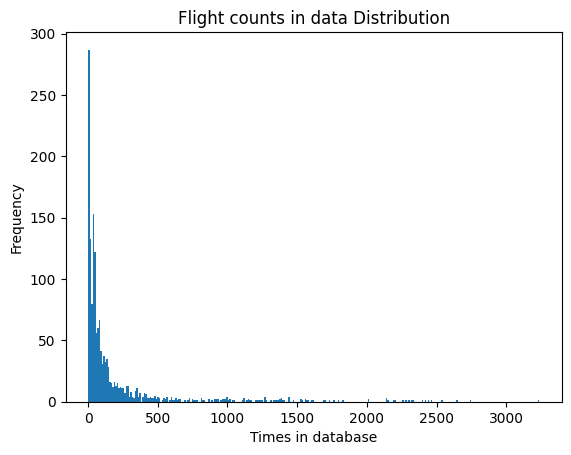

In [15]:
df.flight.value_counts().plot(kind = 'hist', bins = 300, title = 'Flight counts in data Distribution', xlabel = 'Times in database')

There are some overrepresented/underrepresented flights in the database. We might want to consider oversampling/undersampling depending on the application and model. 

## Source City (departure)

In [16]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

<Axes: title={'center': 'Source Cities'}, xlabel='source_city'>

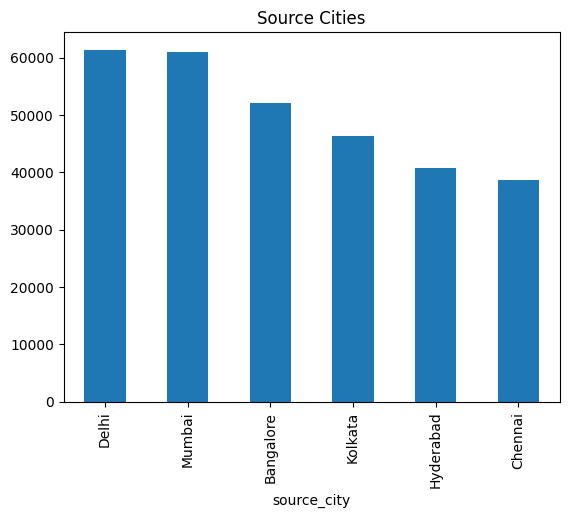

In [17]:
df.source_city.value_counts().plot(kind = 'bar', title = 'Source Cities')

[Text(0.5, 1.0, 'Log-price distribution per source city')]

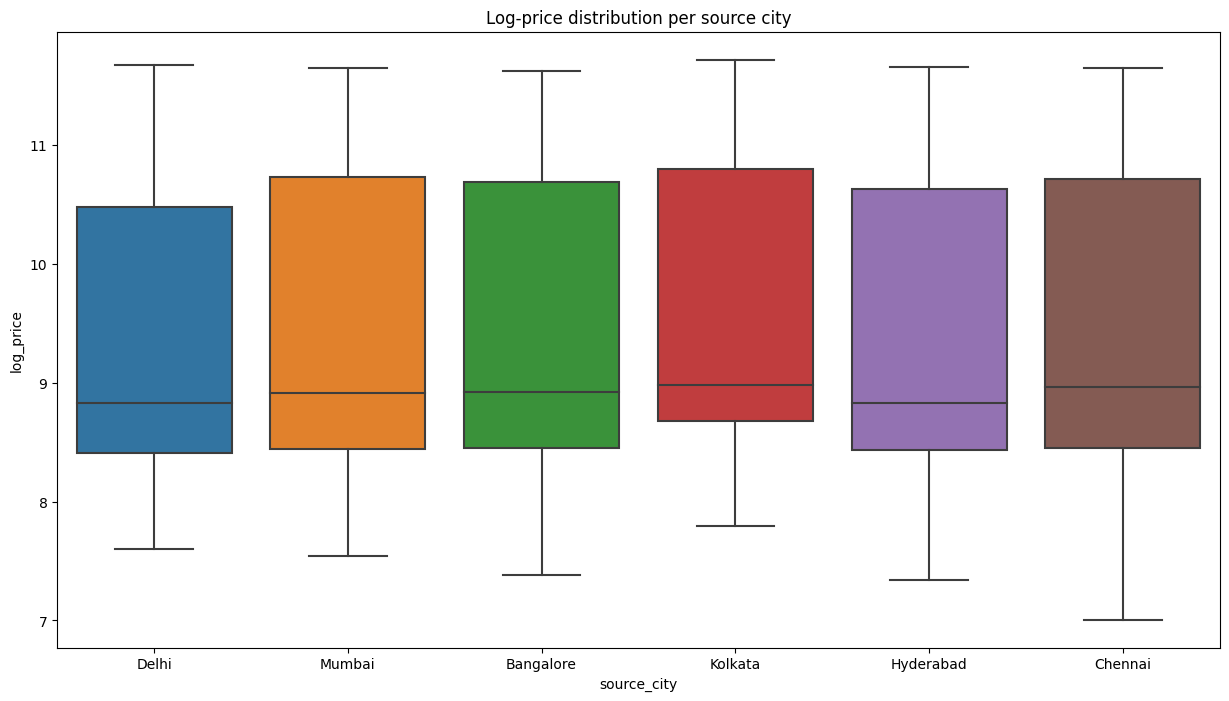

In [19]:
# Group data by source city and get boxplot for price
plt.figure(figsize=(15,8))
sns.boxplot(x="source_city", y="log_price", data=df).set(title = 'Log-price distribution per source city')

We only have 6 source cities. Deli & Mumbai are the most popular source cities. Log-price distribution of tickets does not vary depending on the source city. 

## Departure Time 

In [20]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of departure time'}, xlabel='departure_time'>

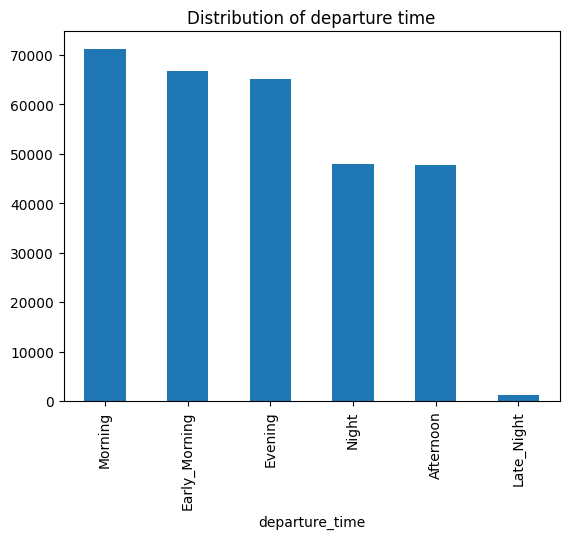

In [21]:
df.departure_time.value_counts().plot(kind = 'bar', title = 'Distribution of departure time')

[Text(0.5, 1.0, 'log-price distribution per departure time')]

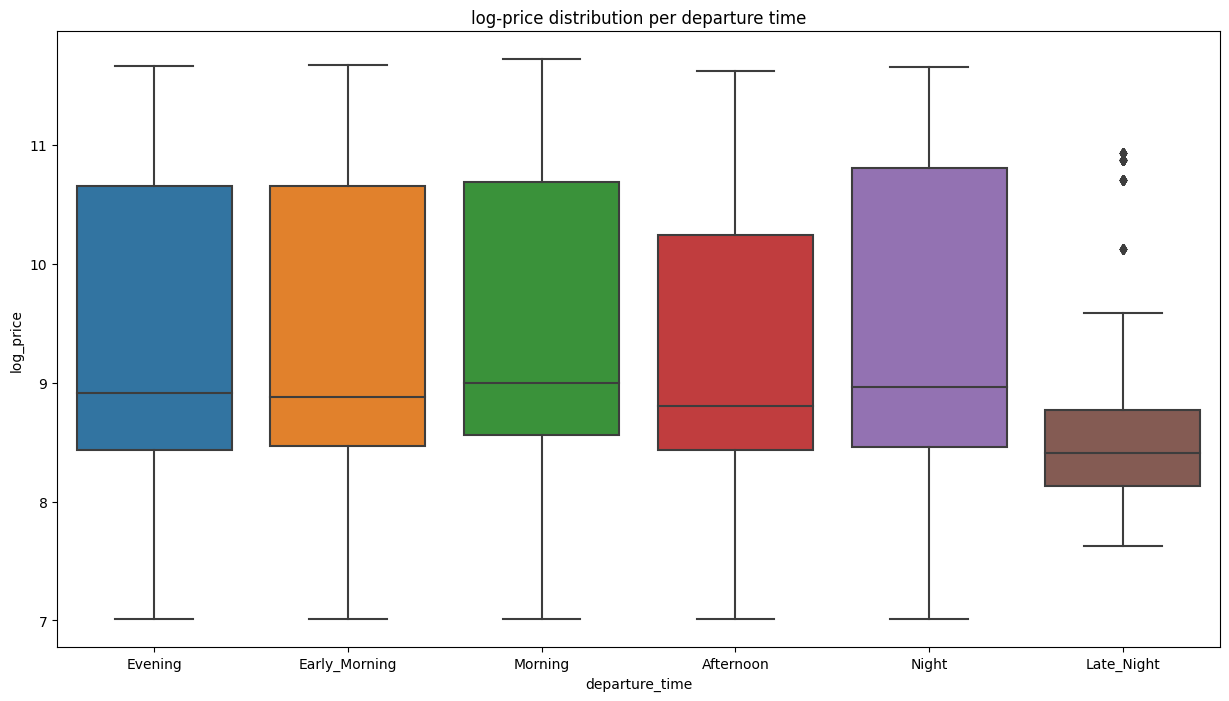

In [22]:
# Group data by source city and get boxplot for price
plt.figure(figsize=(15,8))
sns.boxplot(x="departure_time", y="log_price", data=df).set(title='log-price distribution per departure time')

Most flights ocurre in the early morning, morning or evening. Few flights on late-night. Log-price distribution is similar for all the departure times, except for late_night which is slightly cheaper. 

## Stops

In [23]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of number of stops'}, xlabel='stops'>

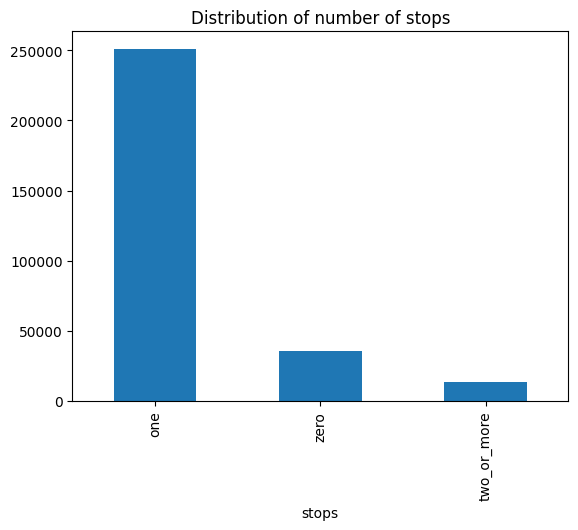

In [24]:
df.stops.value_counts().plot(kind = 'bar', title = 'Distribution of number of stops')

[Text(0.5, 1.0, 'log-price distribution per number of stops')]

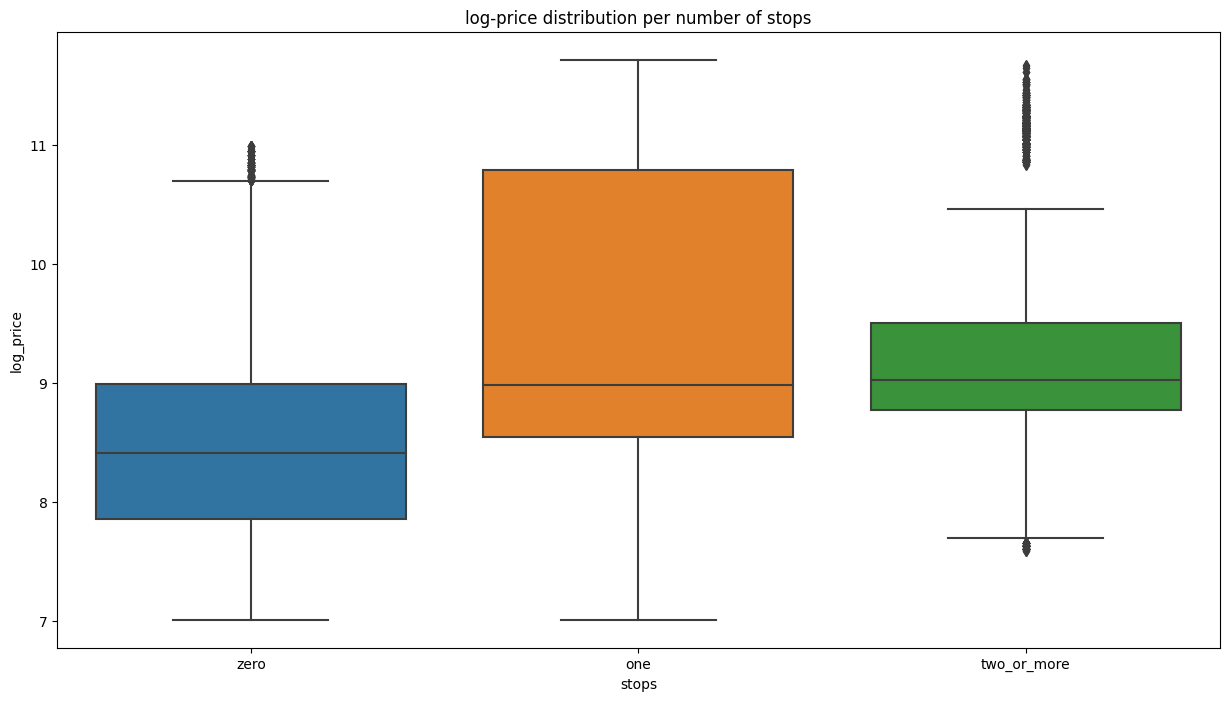

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(x="stops", y="log_price", data=df).set(title='log-price distribution per number of stops')

Most flights have one stop. Surprisingly, one-stop and two+ stop tickets have a higher price than direct flights. 

## Arrival time

In [26]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of arrival times'}, xlabel='arrival_time'>

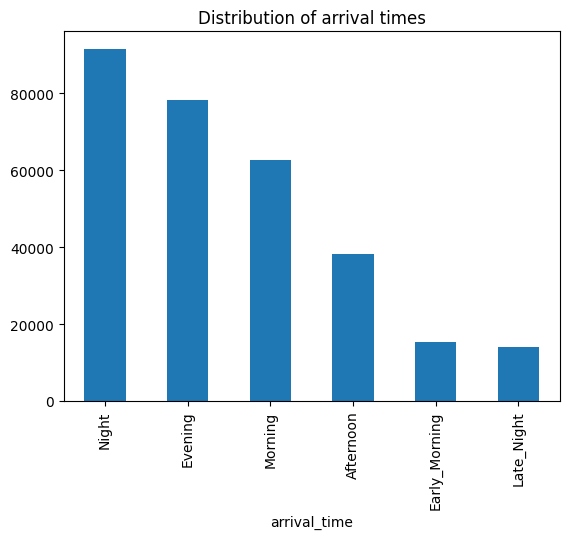

In [27]:
df.arrival_time.value_counts().plot(kind = 'bar', title = 'Distribution of arrival times')

[Text(0.5, 1.0, 'log-price distribution per arrival time')]

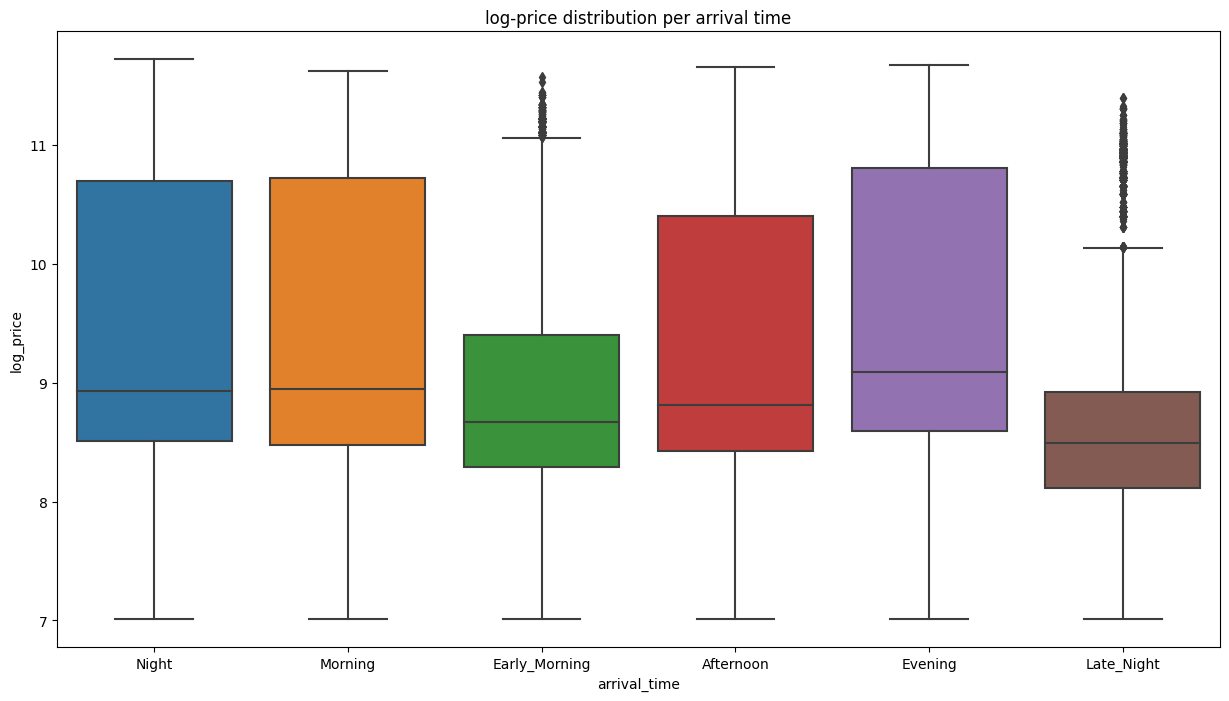

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x="arrival_time", y="log_price", data=df).set(title='log-price distribution per arrival time')

Most arrivals ocurre at night or in the evening. Few flights on early-morning or late-night. Log-price distribution is similar for all the arrival times, except for early moning and late night which are slightly cheaper. 

## Destination city

In [29]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of destination city'}, xlabel='destination_city'>

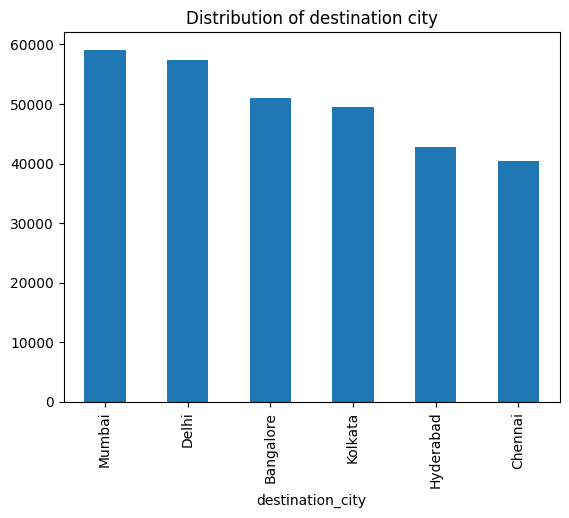

In [30]:
df.destination_city.value_counts().plot(kind = 'bar', title = 'Distribution of destination city')

[Text(0.5, 1.0, 'log-price distribution per destination city')]

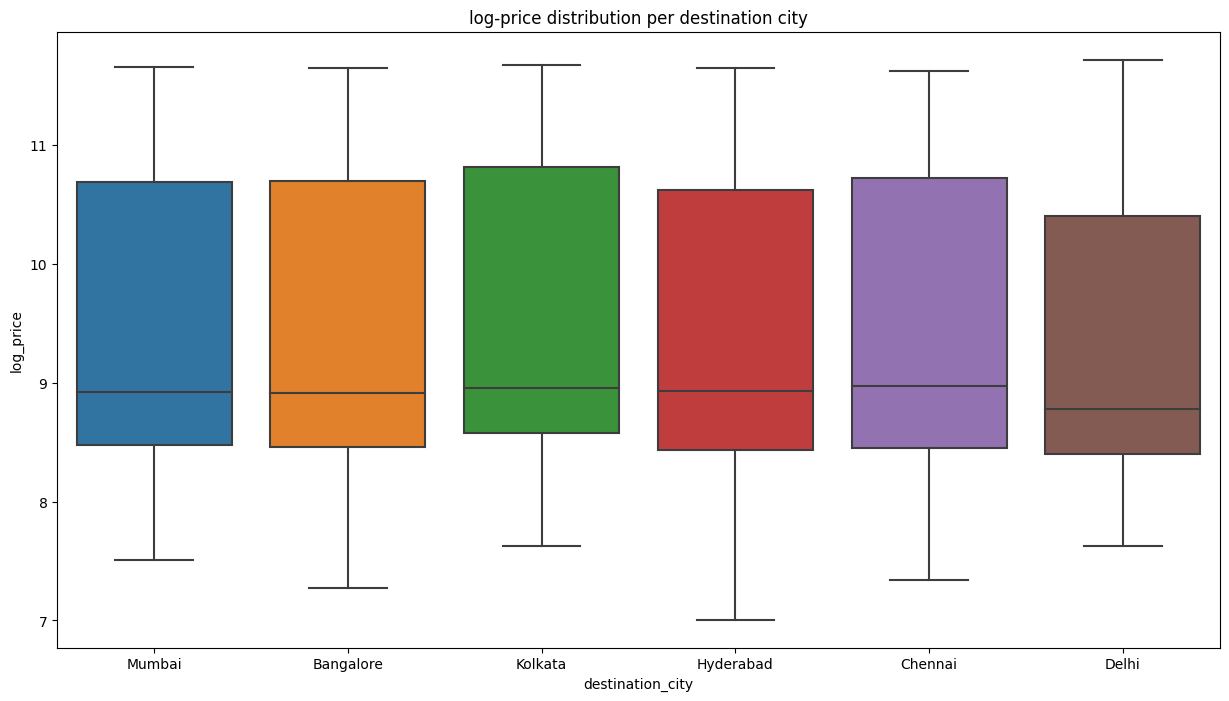

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x="destination_city", y="log_price", data=df).set(title='log-price distribution per destination city')

Mumbi and Delhi are the most popular destination cities. Log-price distribution of tickets dos not vary depending on the destination city. 

## Class

In [34]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: xlabel='class'>

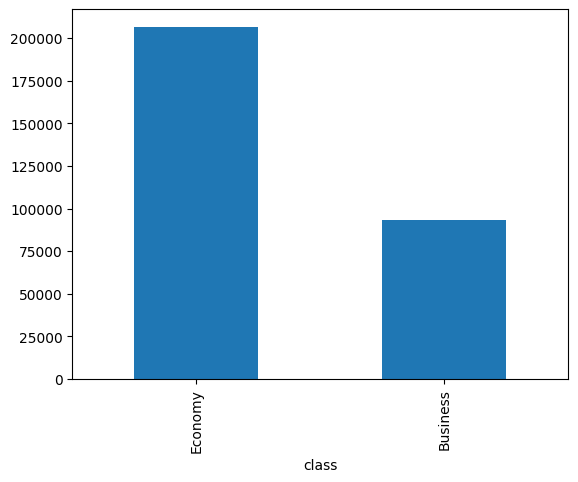

In [35]:
df['class'].value_counts().plot(kind = 'bar')

[Text(0.5, 1.0, 'log-price distribution per class')]

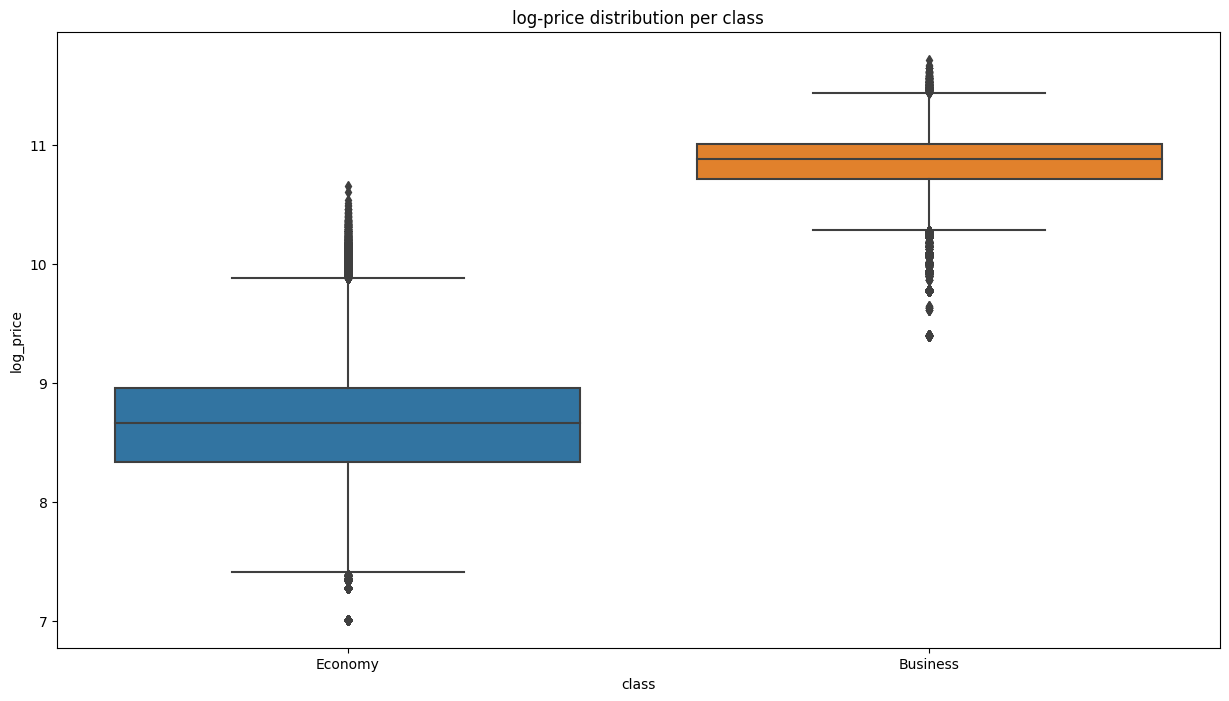

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x="class", y="log_price", data=df).set(title='log-price distribution per class')

Class imbalance for class of ticket. Might need to consider oversampling/undersampling. As expected Economy class tickets are cheaper than buisness class tickets. 

## Duration

<Axes: title={'center': 'Distribution of flight duration in hours'}, ylabel='Frequency'>

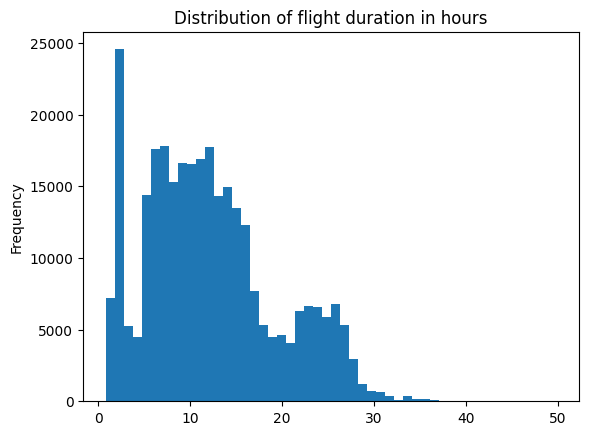

In [39]:
df.duration.plot(kind = 'hist', title = 'Distribution of flight duration in hours', bins = 50)

<Axes: title={'center': 'Distribution of flight log duration in hours'}, ylabel='Frequency'>

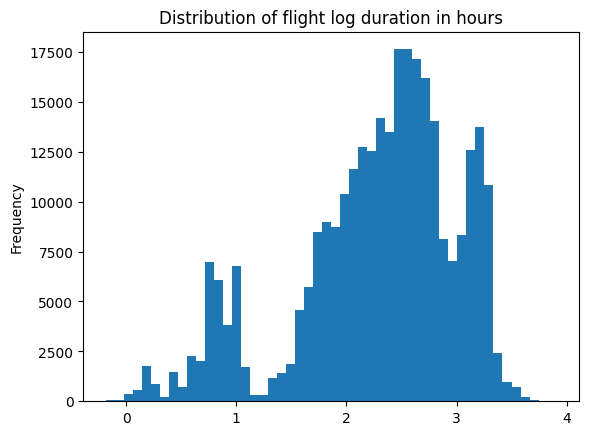

In [42]:
np.log(df.duration).plot(kind = 'hist', title = 'Distribution of flight log duration in hours', bins = 50)

<Axes: title={'center': 'Distribution of flight sqrt duration in hours'}, ylabel='Frequency'>

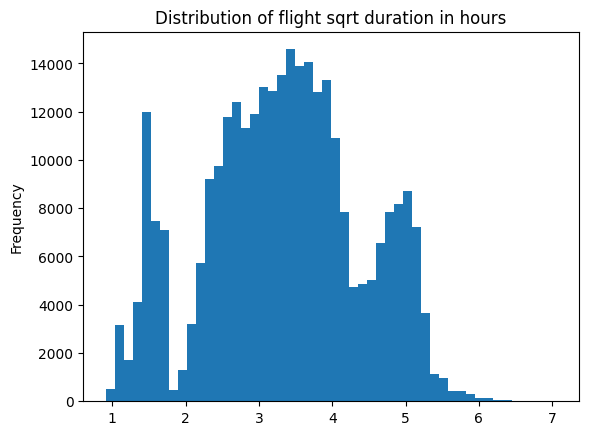

In [43]:
np.sqrt(df.duration).plot(kind = 'hist', title = 'Distribution of flight sqrt duration in hours', bins = 50)

[Text(0.5, 1.0, 'log-Price vs sqrt-Duration by Class of ticket'),
 Text(0.5, 0, 'sqrt_duration'),
 Text(0, 0.5, 'Price')]

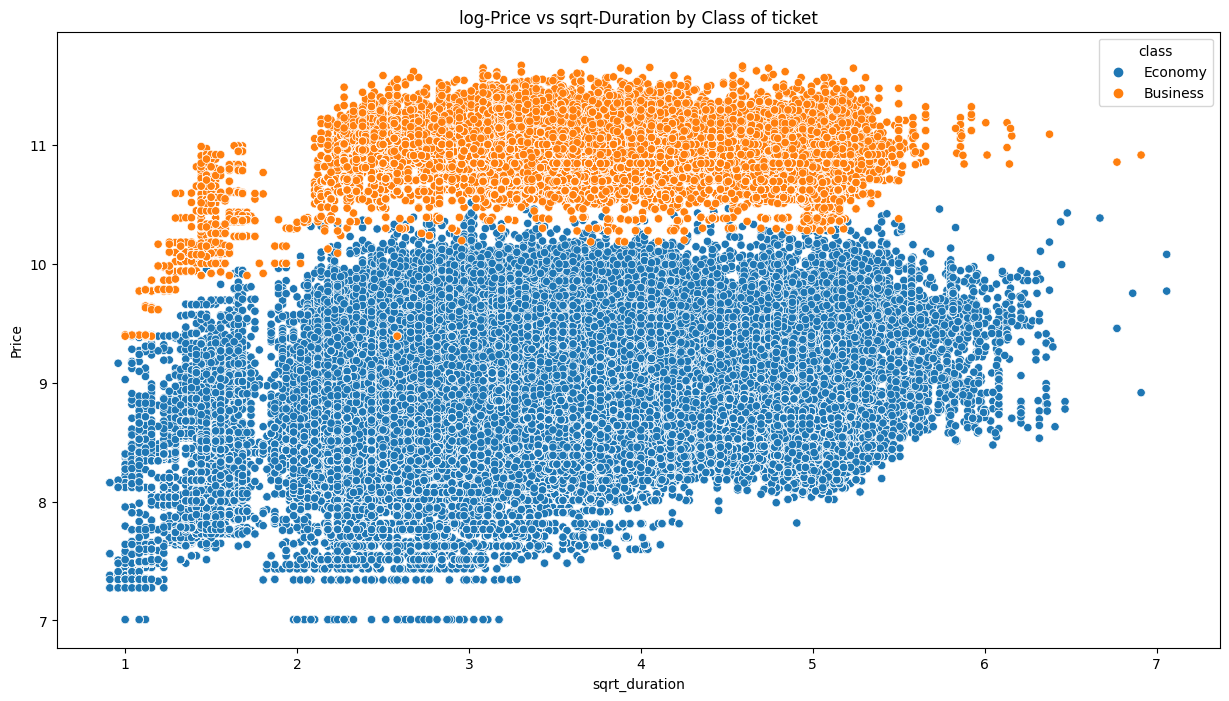

In [66]:
plt.figure(figsize=(15,8))
df["sqrt_duration"] = np.sqrt(df.duration)
sns.scatterplot(x = "sqrt_duration", y = "log_price", data = df, hue = "class").set(title = 'log-Price vs sqrt-Duration by Class of ticket', xlabel = 'sqrt_duration', ylabel = 'Price')

There is no clear linear relation between price and duration.

## Days Left

<Axes: title={'center': 'Days left: days between booking and flight'}, ylabel='Frequency'>

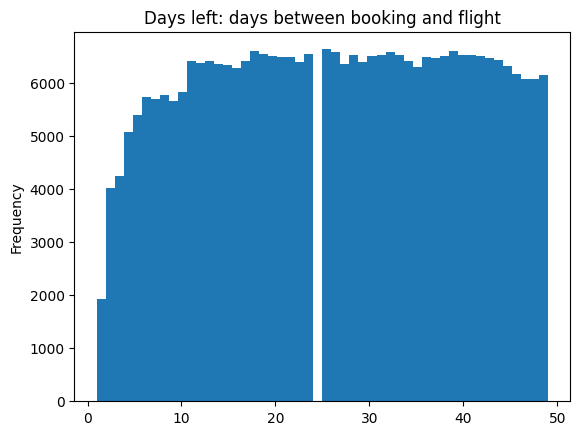

In [58]:
df.days_left.plot(kind = 'hist', title = 'Days left: days between booking and flight', bins = 50)

[Text(0.5, 1.0, 'log-Price vs Days left by Class of ticket'),
 Text(0.5, 0, 'days_left'),
 Text(0, 0.5, 'log-Price')]

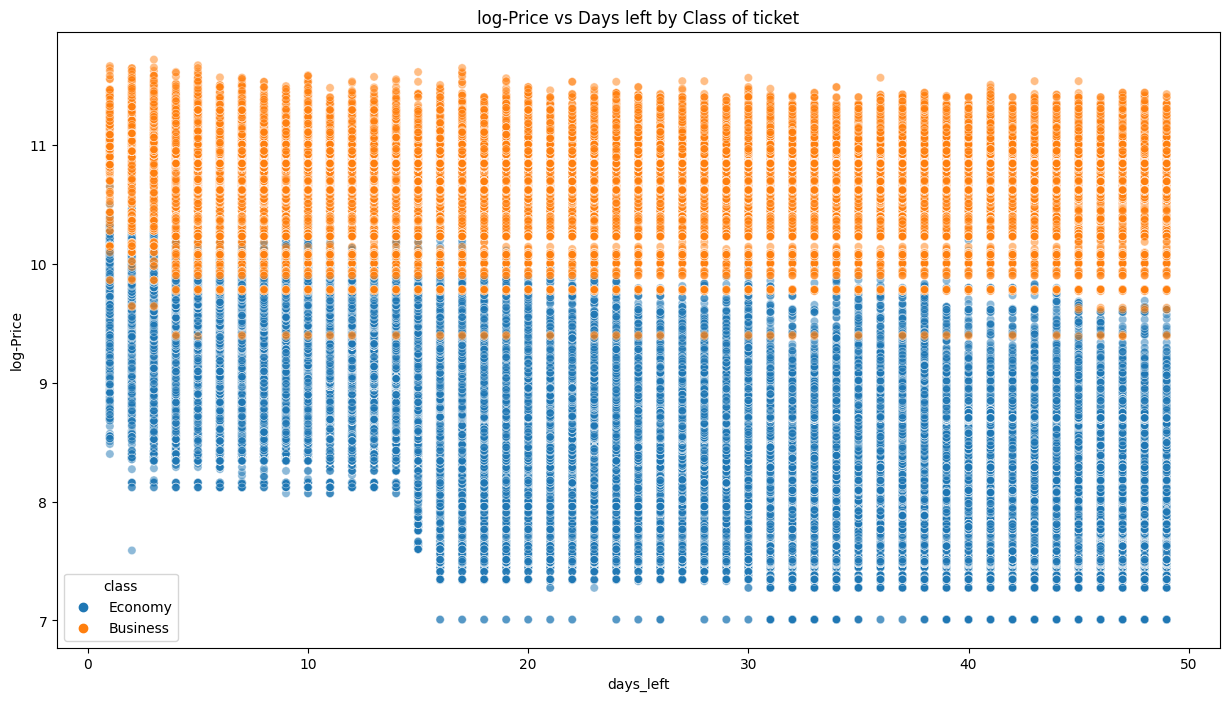

In [68]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "days_left", y = "log_price", data = df, hue = "class", alpha = 0.5).set(title = 'log-Price vs Days left by Class of ticket', xlabel = 'days_left', ylabel = 'log-Price')

No strong linear negative relation between log-price & days between booking and flight. 

### Summary & suggestions for cleanning: 
- Transform price into log(price).
- Vistara & Air India are the most expensive airlines. 
- We have some flights (routes) over/under represented. Consider oversampling? 
- We only have 6 source cities. Deli & Mumbai are the most popular source cities. Log-price distribution of tickets does not vary depending on the source city. 
- Log-price distribution of tickets does not vary depending on the deparutre time (late night flights are slightly cheaper).
- Most flights have one stop. Surprisingly, one-stop and two+ stop tickets have a higher price than direct flights. 
- Log-price distribution is similar for all the arrival times, except for early moning and late night which is slightly cheaper.
- Mumbi and Delhi are the most popular destination cities. Log-price distribution of tickets dos not vary depending on the destination city. 
- Class imbalance for class of ticket. Might need to consider oversampling/undersampling. As expected Economy class tickets are cheaper than buisness class tickets. 
- There is no clear linear relation between price and duration.
- No strong linear negative relation between log-price & days between booking and flight. 
- The business.csv and economy.csv have the "raw" data from which we could try to recover the date (discuss)
- Duration is skewed. Need to discuss approapriate transformation. 